In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset**

In [ ]:
# Loading the Wines Dataset
dataaset=load_wine()

**Splitting the dataset into X and Y**

In [ ]:
X=dataaset.data
y=dataaset.target

In [ ]:
wine_dataset=pd.DataFrame(data=np.c_[X,y],columns=dataaset.feature_names+['target'])

In [ ]:
wine_dataset.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0     0.0  
1                          3.40   1050.0     0.0  
2                          3.17   1185.0     0.0  
3                          3.45   1480.0     0.0  
4                          2.93    735.0     0.0

**Data Preprocessing**

In [ ]:
wine_dataset.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [ ]:
wine_dataset.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [ ]:
wine_dataset.drop_duplicates(keep='first',inplace=True)

In [ ]:
X=wine_dataset.drop('target',axis=1).values
y=wine_dataset['target'].values

Exploratory Data Analysis

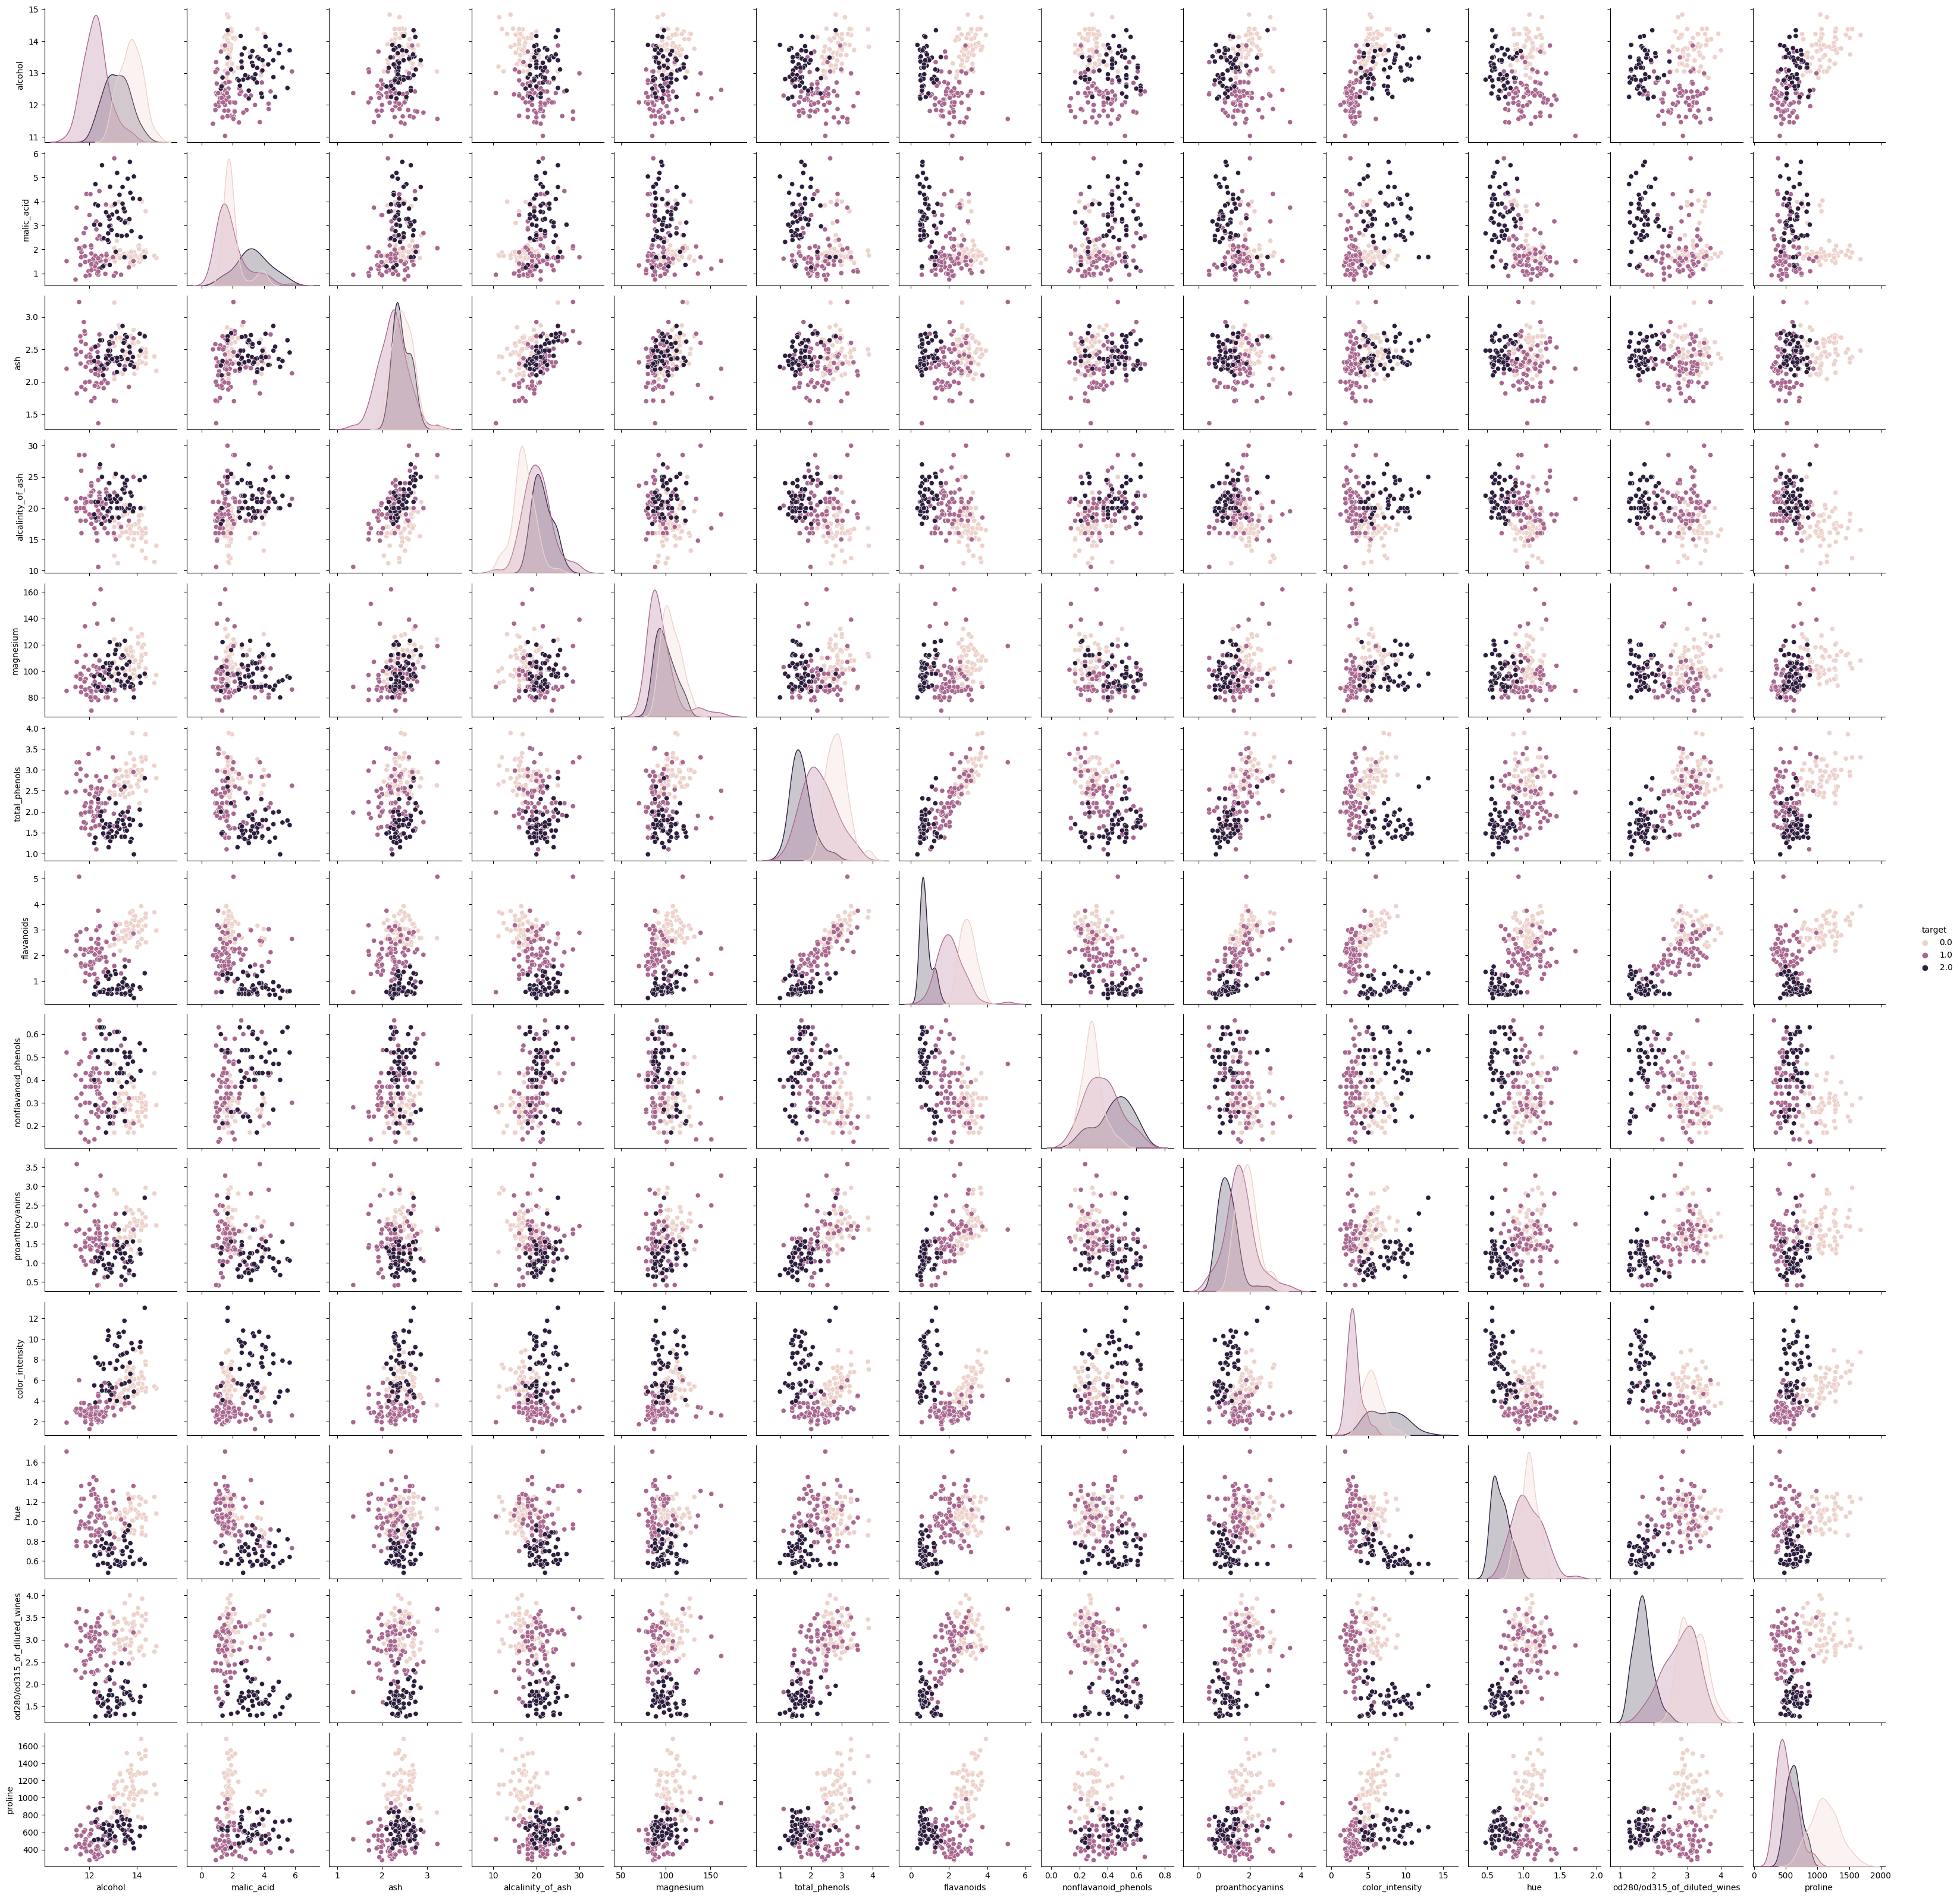

In [ ]:
sns.pairplot(wine_dataset, hue='target', diag_kind='kde')
plt.show()

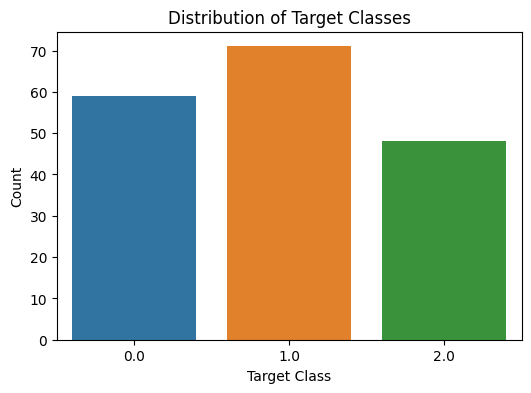

In [ ]:
# Distribution of target classes
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=wine_dataset)
plt.title("Distribution of Target Classes")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.show()

**Splitting the Dataset to train and test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Feature Scaling**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Decision tree classifier**

In [ ]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)
y_pred_dt = decision_tree_model.predict(X_test_scaled)

In [ ]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.9629629629629629


In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

Text(120.58159722222221, 0.5, 'True Label')

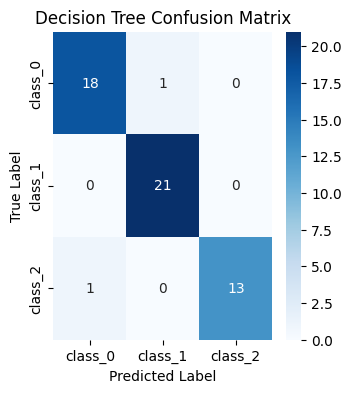

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.heatmap(cm_dt, annot=True, cmap="Blues", fmt="d", xticklabels=dataaset.target_names, yticklabels=dataaset.target_names)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

**Random Forest model**

In [ ]:
random_forest_model = RandomForestClassifier(random_state=40)
random_forest_model.fit(X_train_scaled, y_train)
y_pred_rf = random_forest_model.predict(X_test_scaled)

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 1.0


In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

Text(33.081597222222214, 0.5, 'True Label')

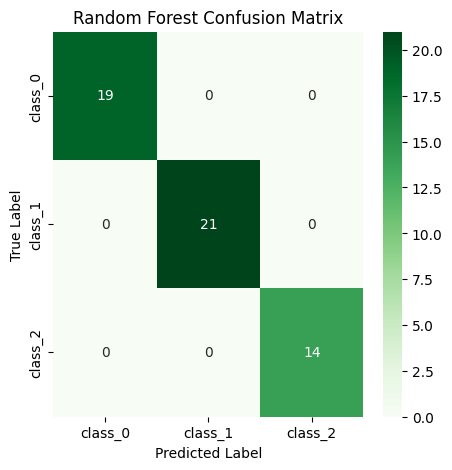

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_rf, annot=True, cmap="Greens", fmt="d", xticklabels=dataaset.target_names, yticklabels=dataaset.target_names)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

**Support vector machine**

In [ ]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

In [ ]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.9814814814814815


In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

Text(33.081597222222214, 0.5, 'True Label')

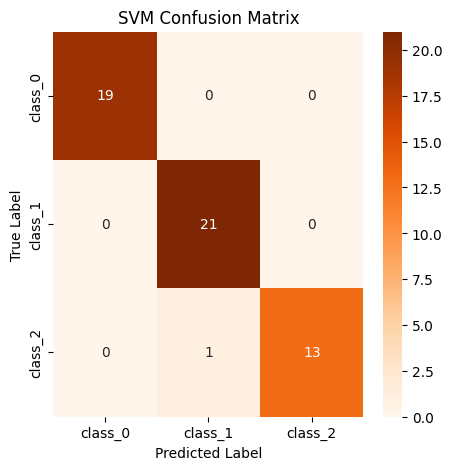

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_svm, annot=True, cmap="Oranges", fmt="d", xticklabels=dataaset.target_names, yticklabels=dataaset.target_names)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

In [ ]:
models = ['Decision Tree', 'Random Forest', 'SVM']
accuracies = [accuracy_dt, accuracy_rf, accuracy_svm]

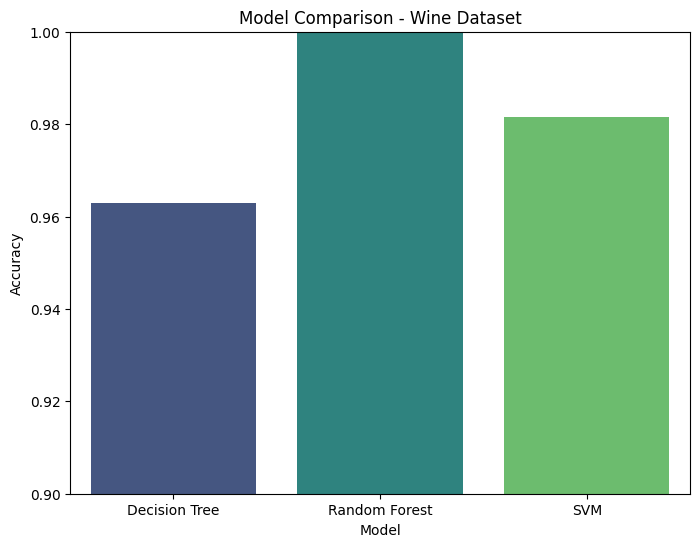

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Comparison - Wine Dataset')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)  # Adjust the y-axis limits for better visualization
plt.show()